In [167]:
%matplotlib inline

import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import pylab as pl
from matplotlib import cm
from sklearn.neighbors import KNeighborsClassifier
from mpl_toolkits.mplot3d import Axes3D

In [149]:
import pandas as pd
Automobile_data = pd.read_csv("../input/automobile-dataset/Automobile_data.csv")
Automobile_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [150]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
keys = [1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
look_up_auto_name = dict(zip(keys, Automobile_data.make.unique()))
look_up_auto_name

{1: 'alfa-romero',
 2: 'audi',
 3: 'bmw',
 4: 'chevrolet',
 5: 'dodge',
 6: 'honda',
 7: 'isuzu',
 8: 'jaguar',
 9: 'mazda',
 10: 'mercedes-benz',
 11: 'mercury',
 12: 'mitsubishi',
 13: 'nissan',
 14: 'peugot',
 15: 'plymouth',
 16: 'porsche',
 17: 'renault',
 18: 'saab',
 19: 'subaru',
 20: 'toyota',
 21: 'volkswagen',
 22: 'volvo'}

In [151]:

Automobile_data.shape

(205, 26)

In [152]:
Automobile_data.groupby('make').size()

make
alfa-romero       3
audi              7
bmw               8
chevrolet         3
dodge             9
honda            13
isuzu             4
jaguar            3
mazda            17
mercedes-benz     8
mercury           1
mitsubishi       13
nissan           18
peugot           11
plymouth          7
porsche           5
renault           2
saab              6
subaru           12
toyota           32
volkswagen       12
volvo            11
dtype: int64

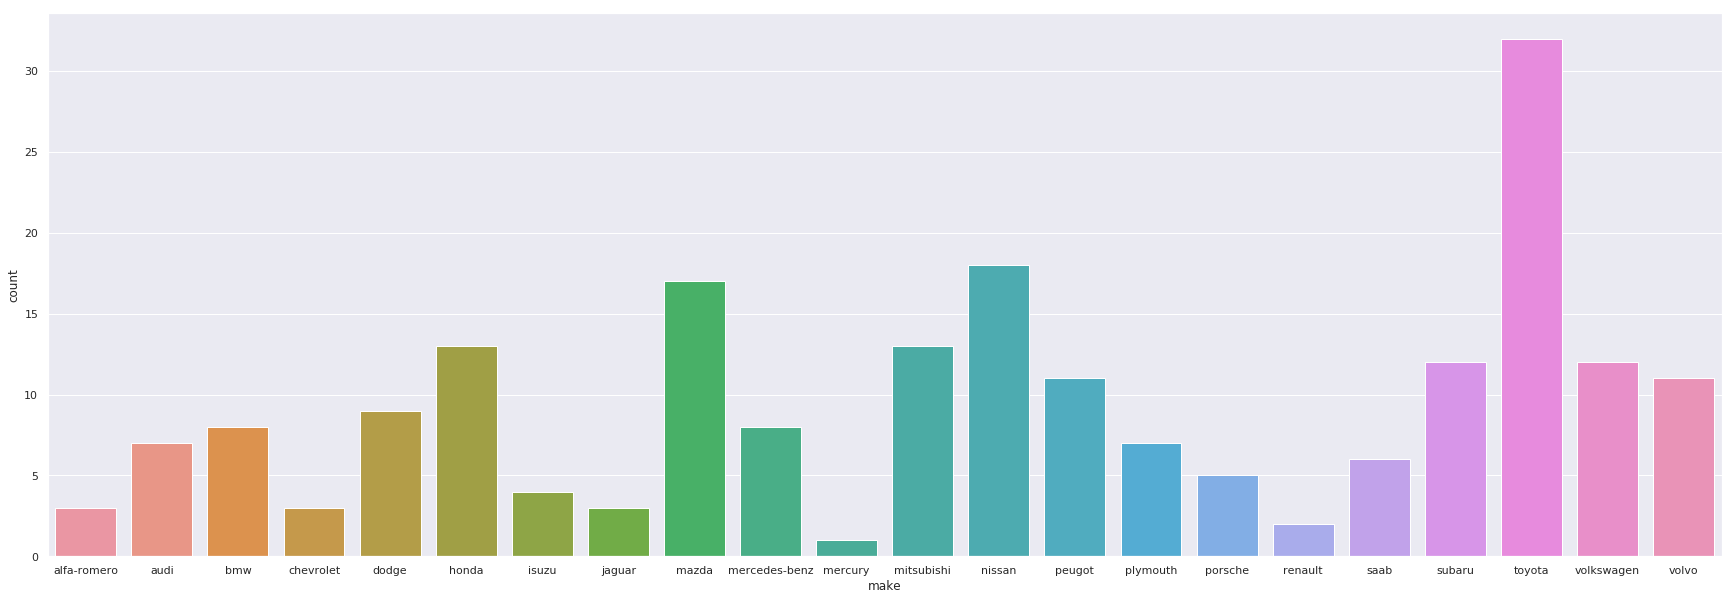

In [153]:
sns.set(rc={'figure.figsize':(30,10)})
sns.countplot(Automobile_data['make'],label="Count")
plt.show()

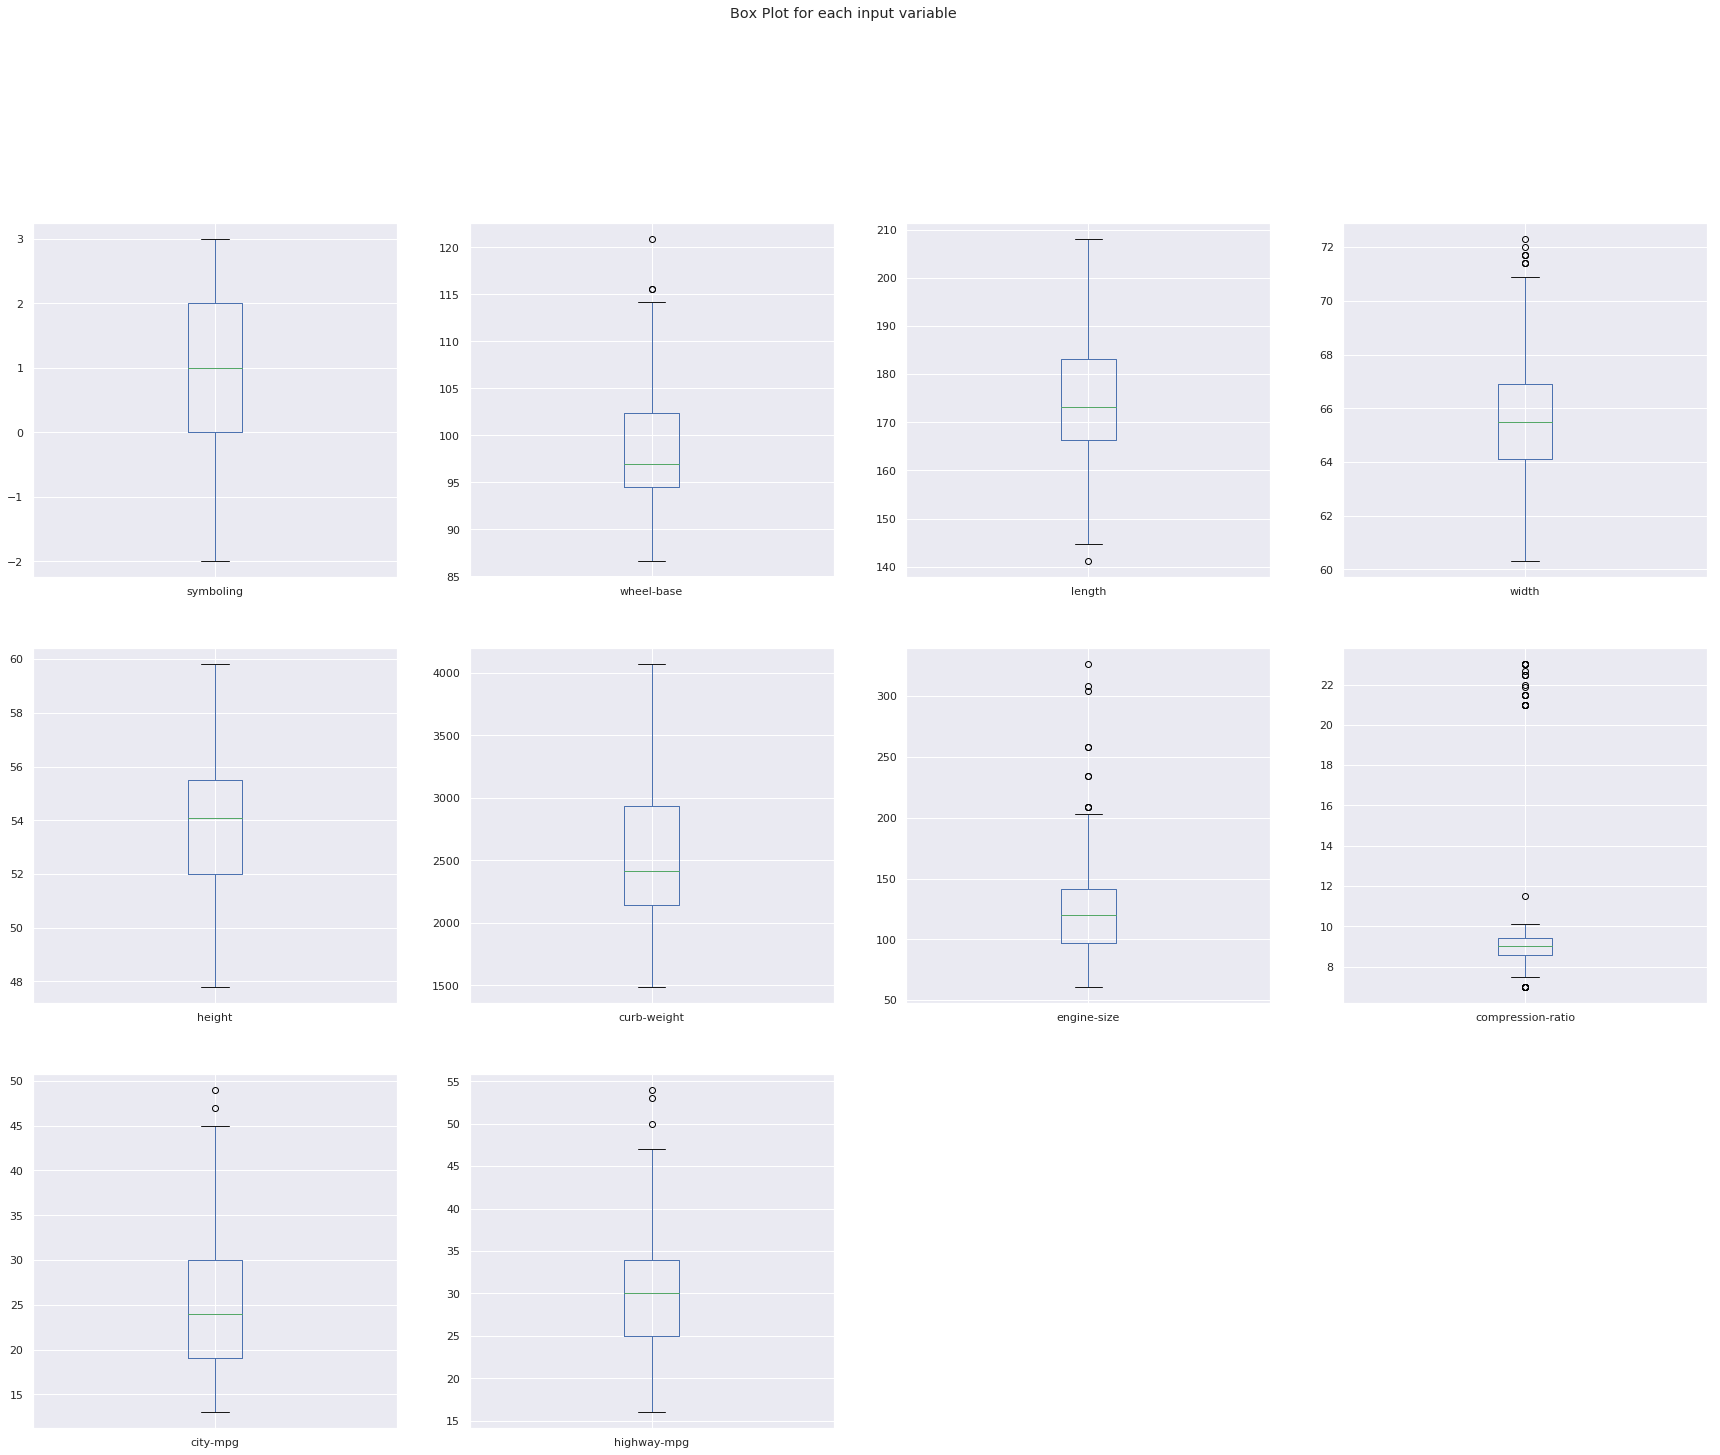

In [154]:
Automobile_data.drop('make', axis=1).plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(30,30), title='Box Plot for each input variable')
plt.savefig('Automobile_box')
plt.show()

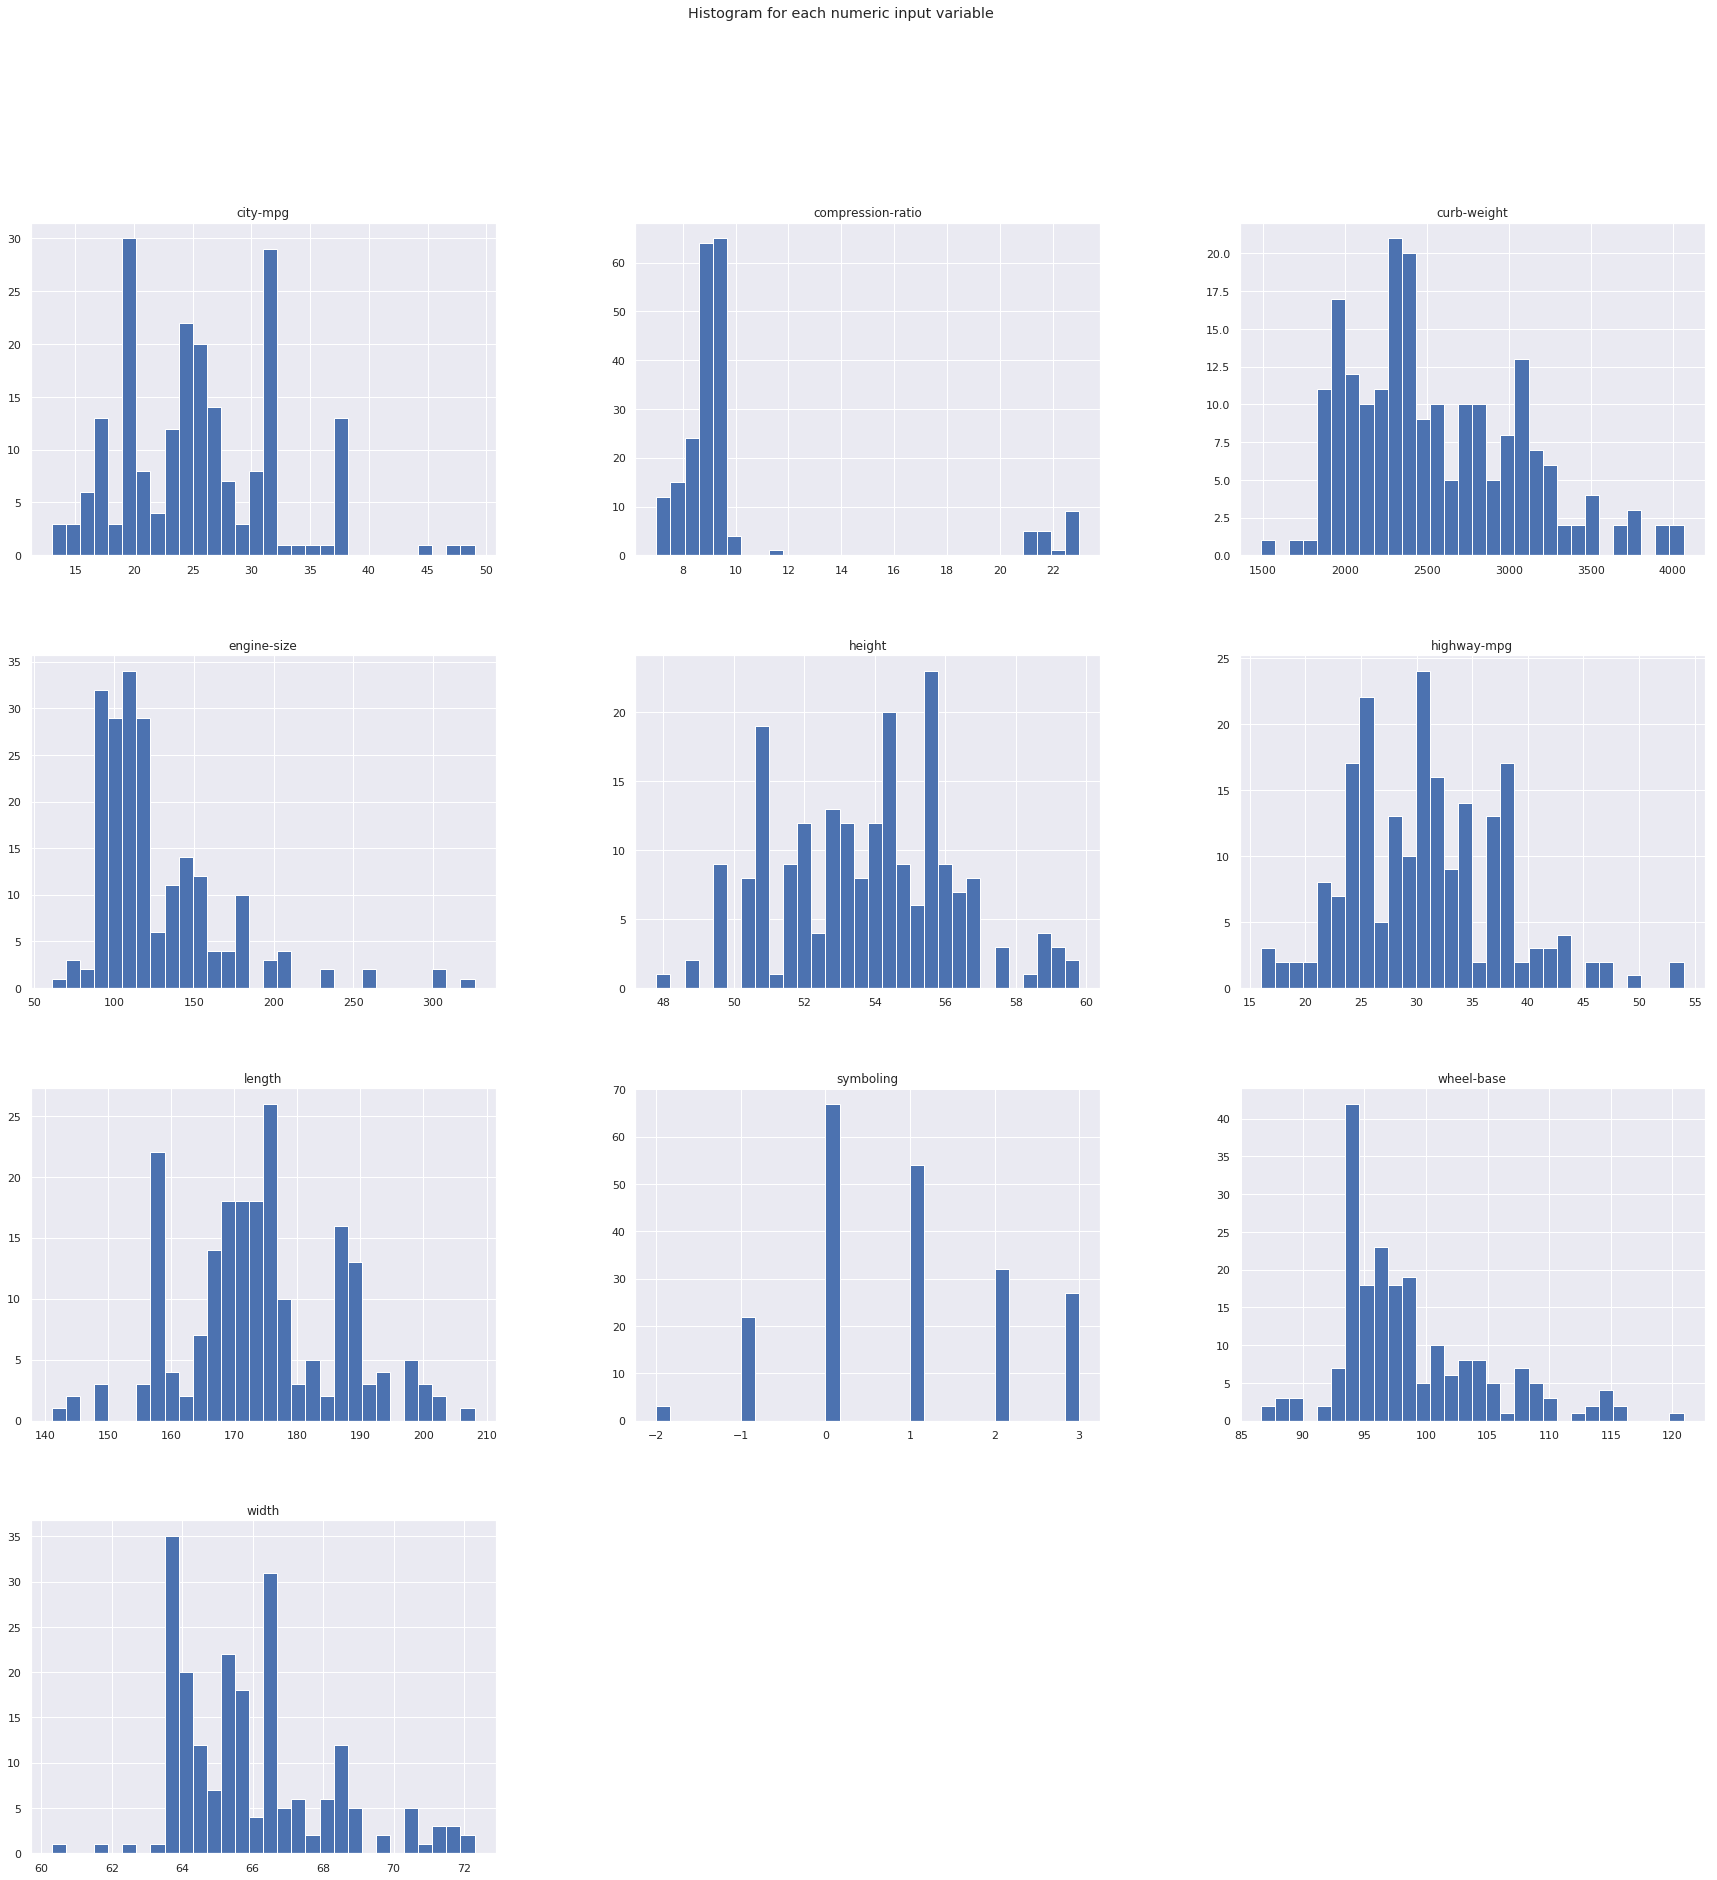

In [155]:
Automobile_data.drop('make' ,axis=1).hist(bins=30, figsize=(30,30))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('Automobile_hist')
plt.show()

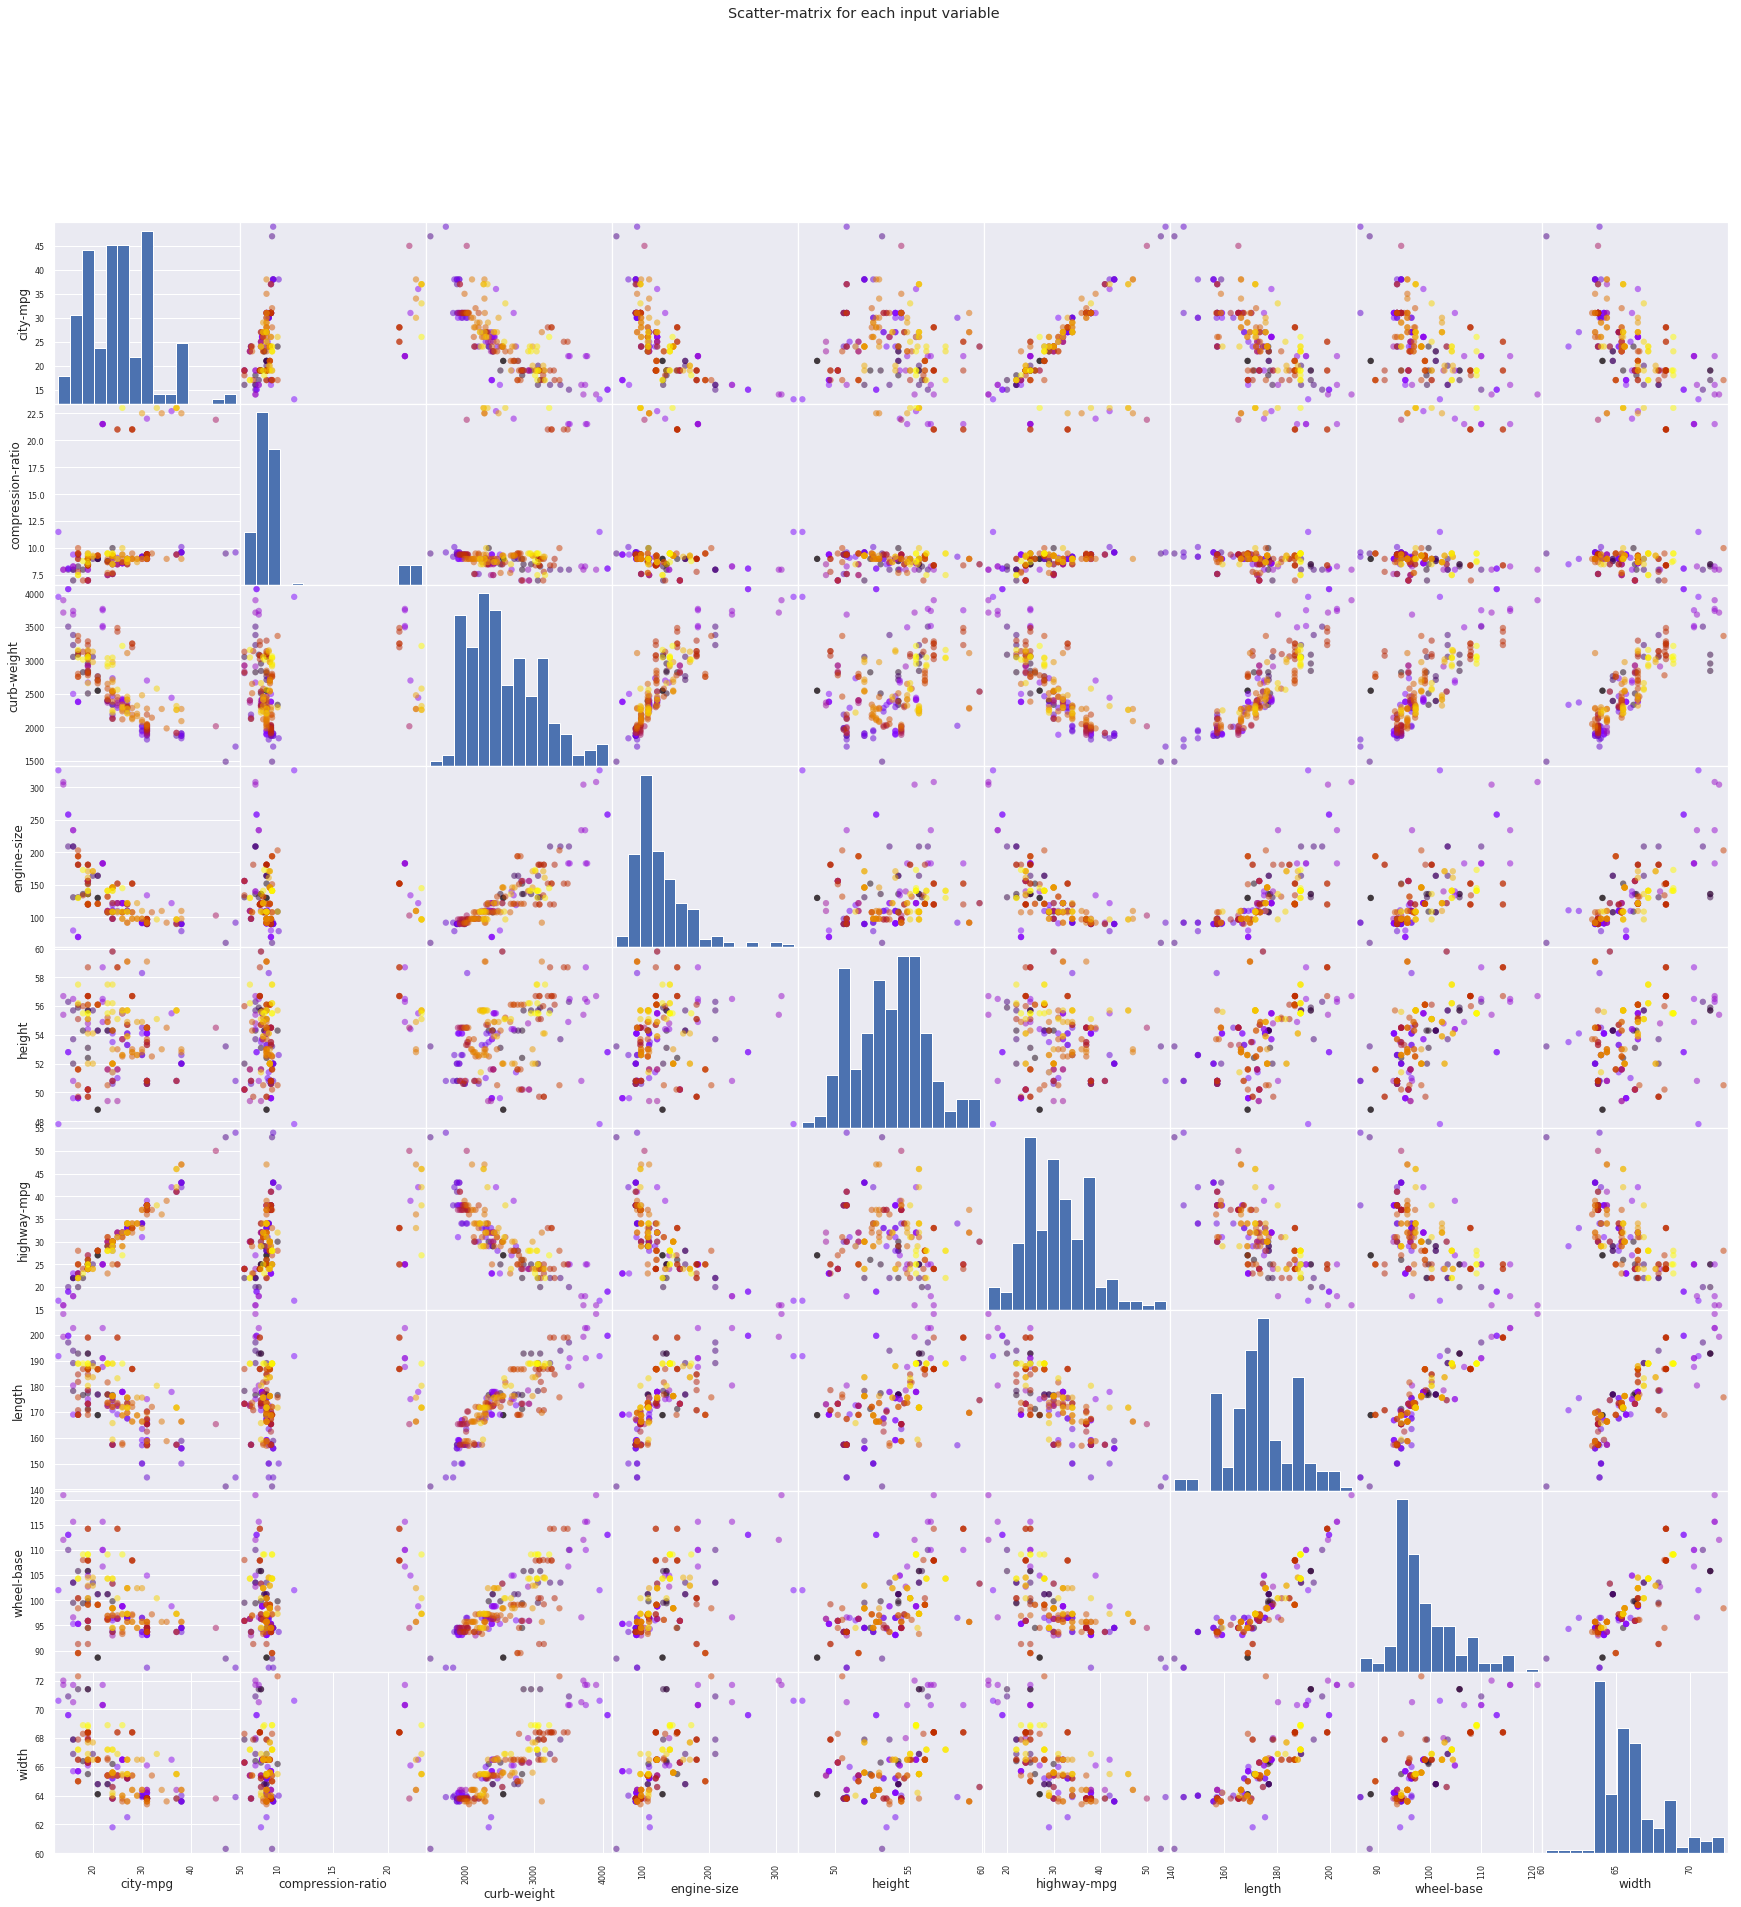

In [156]:
feature_names = ['city-mpg', 'compression-ratio', 'curb-weight', 'engine-size','height','highway-mpg','length','wheel-base','width']
X = Automobile_data[feature_names]
Y = Automobile_data['make']
z = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205])

# plotting a scatter matrix
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = z, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(30,30), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('Automobile_scatter_matrix')

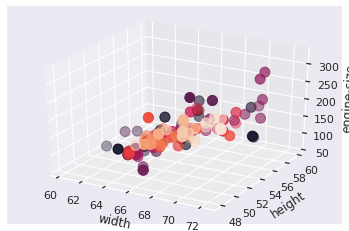

In [168]:
# plotting a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X['width'], X['height'], X['engine-size'], c = z, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('engine-size')
plt.show()

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [169]:
# Create classifier object


knn = KNeighborsClassifier(n_neighbors = 5)
# Train the classifier using the training data
knn.fit(X_train, y_train)
print('Точність класифікатора "K-найближчих сусідів" на навчальному наборі: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Точність класифікатора "K-найближчих сусідів" на тестовому наборі: {:.2f}'
     .format(knn.score(X_test, y_test)))

Точність класифікатора "K-найближчих сусідів" на навчальному наборі: 0.45
Точність класифікатора "K-найближчих сусідів" на тестовому наборі: 0.23


In [159]:

# Use the trained k-NN classifier model to classify new, previously unseen objects
Automobile_prediction = knn.predict([[29, 9.0, 2169, 98,52.6,34,168.7,94.5,64.0]])
print(Automobile_prediction)

['subaru']


In [160]:
Automobile_prediction = knn.predict([[26, 8.6, 2385, 122,53.7,32,177.8,98.8,66.5]])
print(Automobile_prediction)

['bmw']


In [162]:
# version 1.0

import numpy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors
import matplotlib.patches as mpatches


def plot_auto_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].as_matrix()
    y_mat = y.as_matrix()


    # Create color maps
    cmap_light = ListedColormap(['#91EC8A', '#B68E1D', '#692184', '#8FF772','#8FF772', '#B029D4', '#796BAB', '#3EC49B','#CEF16E' , '#0CA0CF', '#D44A2E', '#338113', '#0BCB18','#E6C61C', '#7B8D3D', '#3E0DDC', '#B49A7B','#61C7AA' , '#0D4737', '#D4DBD4', '#5F9266','#4F86B4'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#AFAFAF','#E76A52', '#811B2D', '#9B7937', '#3940DC' , '#22F0EC' , '#79AA29', '#789F68', '#922D46', '#802101','#D5DE7F', '#3C3860', '#1C8384', '#457686' , '#C8E237' , '#767CC4', '#8BBC8D', '#B372CB' , '#FA296B'])
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
    
    

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.

    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, mesh_step_size),
                            numpy.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(numpy.c_[xx.ravel(), yy.ravel()])
    
    

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    # plt.pcolormesh(xx, yy, Z, cmap=cmap_light) #

    # Plot training points
    op = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153])
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=op, cmap=cmap_bold, edgecolor='black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


    patch0 = mpatches.Patch(color='#FF0000', label='alfa-romero')
    patch1 = mpatches.Patch(color='#00FF00', label='audi')
    patch2 = mpatches.Patch(color='#0000FF', label='bmw')
    patch3 = mpatches.Patch(color='#AFAFAF', label='chevrolet')
    patch4 = mpatches.Patch(color='#e76a52', label='dodge')
    patch5 = mpatches.Patch(color='#811b2d', label='honda')
    patch6 = mpatches.Patch(color='#9b7937', label='isuzu')
    patch7 = mpatches.Patch(color='#3940dc', label='jaguar')
    patch8 = mpatches.Patch(color='#22f0ec', label='mazda')
    patch9 = mpatches.Patch(color='#79aa29', label='mercedes')
    patch10 = mpatches.Patch(color='#789f68', label='mercury')
    patch11 = mpatches.Patch(color='#922d46', label='mitsubishi')
    patch12 = mpatches.Patch(color='#802101', label='nissan')
    patch13 = mpatches.Patch(color='#d5de7f', label='peugot')
    patch14 = mpatches.Patch(color='#3c3860', label='plymouth')
    patch15 = mpatches.Patch(color='#1c8384', label='porsche')
    patch16 = mpatches.Patch(color='#457686', label='renault')
    patch17 = mpatches.Patch(color='#c8e237', label='saab')
    patch18 = mpatches.Patch(color='#767cc4', label='subaru')
    patch19 = mpatches.Patch(color='#8bbc8d', label='toyota')
    patch20 = mpatches.Patch(color='#b372cb', label='volkswagen')
    patch21 = mpatches.Patch(color='#fa296b', label='volvo')
    plt.legend(handles=[patch0, patch1, patch2, patch3, patch4, patch5, patch6, patch7, patch8, patch9, patch10, patch11, patch12, patch13, patch14, patch15, patch16, patch17, patch18, patch19, patch20, patch21])

    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    plt.title("9-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.show()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


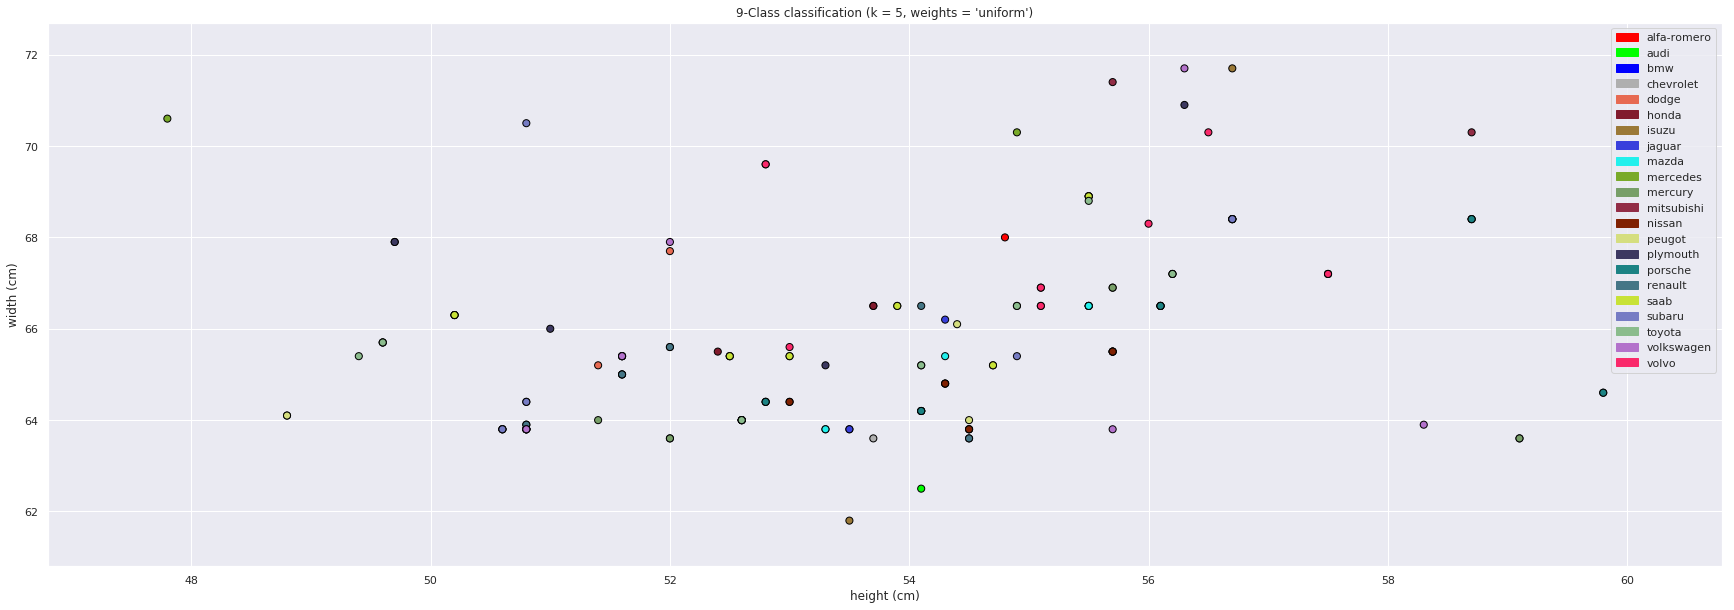

In [163]:
# plot the decision boundaries of the k-NN classifier
plot_auto_knn(X_train, y_train, 5, 'uniform')

([<matplotlib.axis.XTick at 0x7f3d75981208>,
 <a list of 5 Text xticklabel objects>)

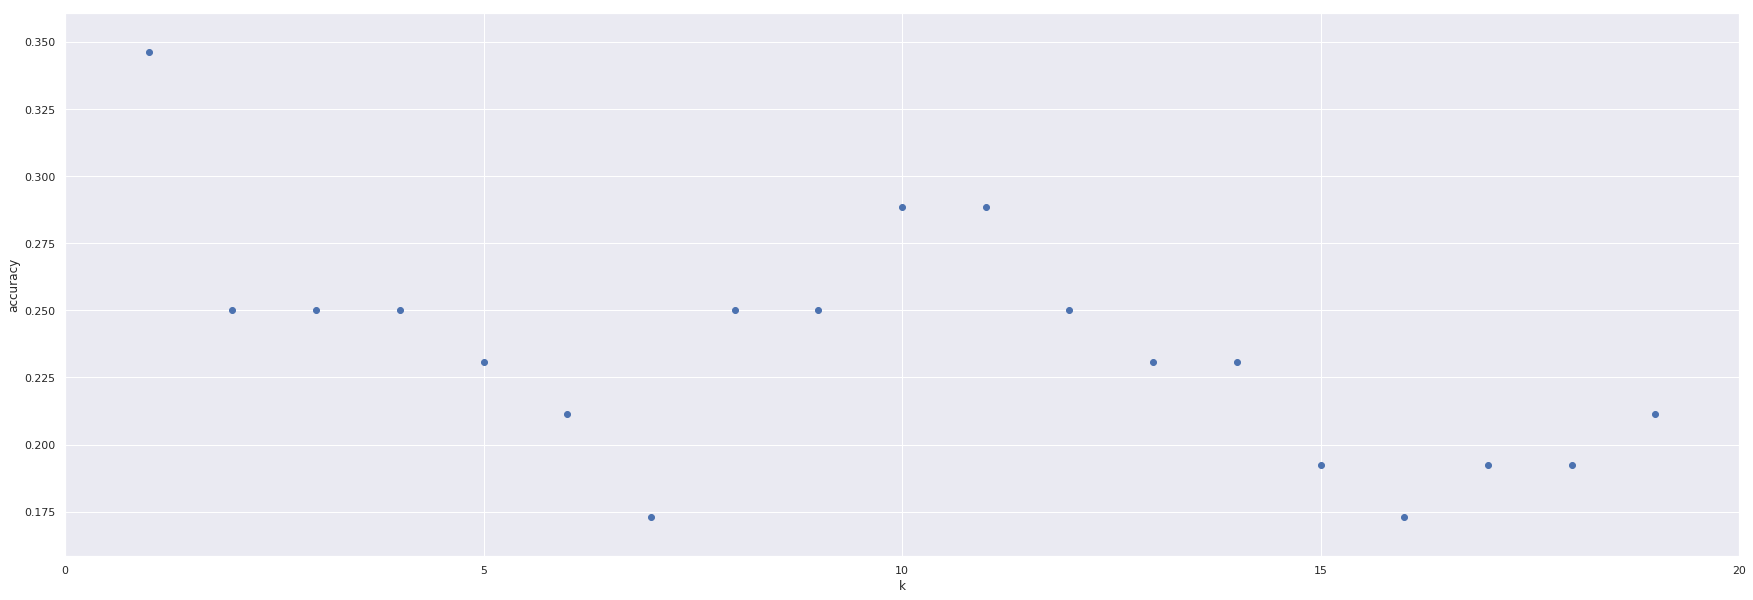

In [164]:
k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0, 5,10,15,20])

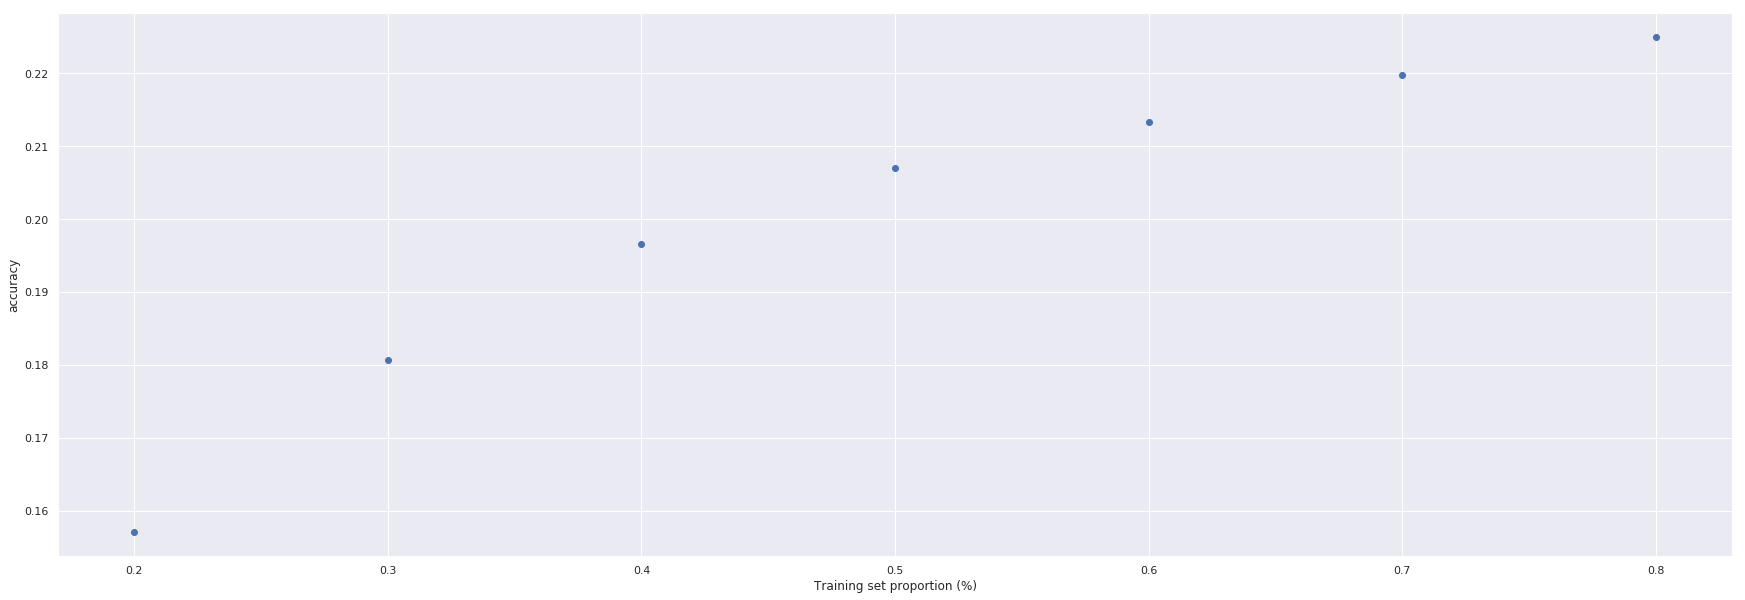

In [147]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]
knn = KNeighborsClassifier(n_neighbors = 5)
plt.figure()
for s in t:
    scores = []
    for i in range(1, 1000):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy')
plt.show()